In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])

In [ ]:
x=df.iloc[:,1:]
x.ndim
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(x)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[308862.06000000006, 212889.44245524303, 143391.59236035676, 104414.67534220168, 75427.71182424155, 58348.641363315044, 51575.2779310779, 44359.634641148325, 40942.51117006117, 37515.84125504126]


Text(0, 0.5, 'varience')

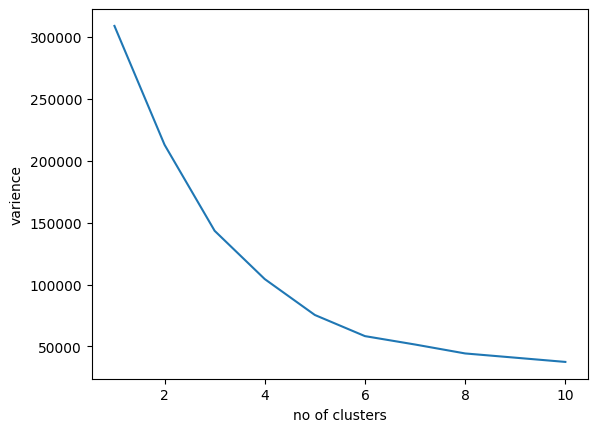

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('varience')

In [ ]:
model1=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_means=model1.fit_predict(x)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 4,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [ ]:
x['Cluster']=y_means
x

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,3
197,1,32,126,74,0
198,1,32,137,18,3


In [ ]:
x1=x.iloc[:,:-1]
x1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
y1=x.iloc[:,-1]
y1

0      5
1      2
2      5
3      2
4      5
      ..
195    0
196    3
197    0
198    3
199    0
Name: Cluster, Length: 200, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x_train

,Genre,Age,Annual Income (k$),Spending Score (1-100)
169,1,32,87,63
97,0,27,60,50
31,0,21,30,73
12,0,58,20,15
35,0,21,33,81
...,...,...,...,...
106,0,66,63,50
14,1,37,20,13
92,1,48,60,49
179,1,35,93,90


In [ ]:
x_test
y_train
y_test

95     4
15     2
30     5
158    3
128    3
115    4
69     4
170    3
174    3
45     2
66     1
182    3
165    0
78     4
186    3
177    0
56     1
152    3
82     1
68     4
124    4
16     5
148    3
93     4
65     4
60     1
84     4
67     1
125    0
132    4
9      2
18     5
55     1
75     4
150    3
104    1
135    0
137    0
164    3
76     1
79     1
197    0
38     5
24     5
122    4
195    0
29     2
19     2
143    0
86     1
114    4
173    0
5      2
126    3
117    1
73     1
140    3
98     1
172    3
96     1
Name: Cluster, dtype: int32

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([4, 2, 5, 3, 3, 4, 4, 3, 3, 2, 1, 3, 0, 4, 3, 0, 1, 3, 1, 4, 4, 5,
       3, 4, 4, 1, 4, 1, 0, 4, 2, 5, 1, 4, 3, 1, 0, 0, 3, 1, 1, 0, 5, 5,
       4, 0, 2, 2, 0, 1, 4, 0, 2, 1, 1, 1, 3, 1, 3, 1], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
matr=confusion_matrix(y_test,y_pred)
matr
score=accuracy_score(y_test,y_pred)
score

0.9833333333333333